# Consider the following function

***Note***: **Ploting markers are optional for this assignment**

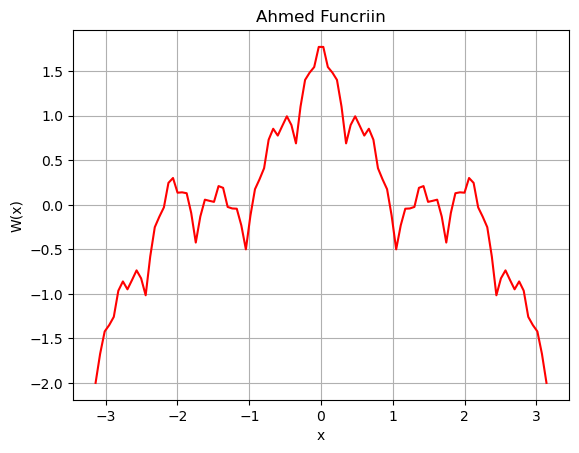

In [1]:
import numpy as np
import numpy.linalg as npl
import scipy.sparse as sps
import matplotlib.pyplot as plt

# Weierstrass function
def W(x, a=0.5, b=3, terms=100):
    return sum(a**n * np.cos(b**n *1.0 * x ) for n in range(terms))
# def W(x, a=0.5, b=3, terms=100):
    # return sum(a**n * np.cos(b**n * np.pi * x) for n in range(terms))

def dW(W, x, h=1e-5):
    return (W(x + h) - W(x - h)) / (2 * h)

# Generate x values
num_points = 100
x = np.linspace(-np.pi, np.pi, num_points)

# Compute the Weierstrass function for all x
W_values = W(x)

# Plotting
plt.plot(x, W_values, color='red')
plt.title('Weierstrass Function')
plt.xlabel('x')
plt.ylabel('W(x)')
plt.grid()
plt.show()


- You are provided with data for 𝑥 and 𝑊 containing a predefined Monster function. Your task is to construct 𝑝(𝑥) for 12 points (for lagrange and newton method) for spline see following table, and then you need to test how closely 𝑝(𝑥) approximates the values of the mentioned function. You must also calculate the RMSE and plot the results step by step as demonstrated in this notebook. Also fill the values from your experment in following table.

In [62]:
#checking numpy version
np.__version__

'1.26.1'

# Comparison of Interpolation Techniques

| Interpolation Method             | RMSE  | Comments/Limitations                        |
|:--------------------------------:|:------:|:------------------------------------------:|
| Lagrange                         |0.324652|   It's simple and useful, but can fail at high oscillation curves|
| Newton's Div Difference          |0.324652|   Usually faster than Lagrange, also may get innacurate with larger oscillation curves|
| Cubic Spline (n = 12)            |0.288496|   It provides smooth approximation graphs|
| Cubic Spline (n = 24)            |0.147531|   Increasing points improves accuracy.      |
| Cubic Spline (n = 48)            |0.120840|   It achieves even higher accuracy and gets much smoother|


In [152]:
# Complete the following function  
import math
   
def RMSE(y_actual, y_predicted):
    MSE = np.mean((np.array(y_actual) - np.array(y_predicted)) ** 2)
    return math.sqrt(MSE)

## Lagrange: Compute $L_i(x)$ here

In [153]:
# TODO: implement lagrange basis for polynomial interpolation
def lagrange_basis(z, x):
    n = len(x)
    m = len(z)
    basis = np.ones((n, m))
    for i in range(n):
        for j in range(n):
            if i != j:
                basis[i,:] *= (z-x[j])/(x[i]-x[j])
    return basis

## Lagrange: Calculate $p(x)$ through $L_i(x)$

In [154]:
# TODO: this functions performs evaluation of polynomial using coefficients computed from direct method
def lagrange_interpolant(z, x, y):
    n = len(x)
    m = len(z)
    P = np.zeros(m)
    basis = lagrange_basis(z, x)
    for i in range(n):
        P += basis[i,:] * y[i]
    return P

## Lagrange: Testing

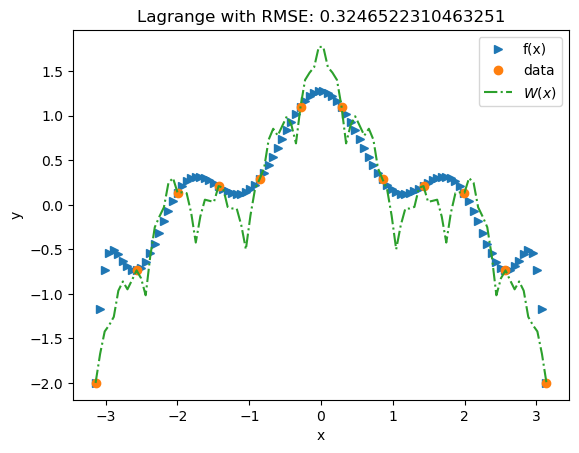

In [155]:
# plot your results as according to following example, you must provide RMSE Value as well    
num_points = 12
x = np.linspace(-np.pi, np.pi, num_points)
y = W(x)

z = np.linspace(-np.pi, np.pi, 100)
yz = lagrange_interpolant(z, x, y)
rmse_value = RMSE(W(z), yz)

# Ploting
plt.plot(z, yz, '>', label="f(x)")
plt.plot(x, y, 'o', label="data")
plt.plot(z, W(z), '-.', label="$W(x)$")
plt.title(f'Lagrange with RMSE: {rmse_value}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [146]:
# Complete the following two functions for newton method
def poly_coeffs(x, y):
    n = len(x)
    a = y.copy()
    for k in range(1,n):
        a[k:n] = (a[k:n] - a[k-1])/(x[k:n] - x[k-1])
    return a

#========================================================================

def poly_evaluation(a,x,z):
    N = len(x) - 1 #Degree of polynomial
    p = a[N]
    for k in range(1,N+1):
        p = a[N-k] + (z - x[N-k])*p
    return p


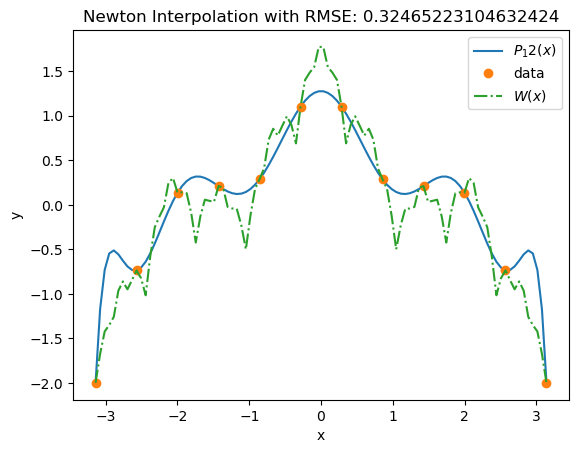

In [147]:
num_points = 12 
x = np.linspace(-np.pi, np.pi, num_points)
y = W(x)

coeffs = poly_coeffs(x, y)
z = np.linspace(-np.pi, np.pi, 100)
yz = poly_evaluation(coeffs, x, z)
rmse_value = RMSE(W(z), yz)

# Plot the results
plt.plot(z, yz, '-', label="$P_12(x)$")
plt.plot(x, y, 'o', label="data")
plt.plot(z, W(z), '-.', label="$W(x)$")
plt.title(f'Newton Interpolation with RMSE: {rmse_value}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [148]:
def MyCubicSpline(x, y, dy0, dyN):
    n = len(x)
    c = np.zeros(n); v = np.zeros(n); u = np.zeros(n-1)
    l = np.zeros(n-1); b = np.zeros(n-1); h = np.zeros(n-1)
    for i in range(n-1):
        h[i] = x[i+1] - x[i]
        b[i] = (y[i+1]-y[i])/h[i] 
    u[0] = 1.0
    v[0] = 6.0*(b[0]-dy0)/h[0]
    c[0] = 2.0
    for i in range(1,n-1):
        c[i] = 2.0
        u[i] = h[i]/(h[i-1] + h[i])
        l[i-1] = h[i-1]/(h[i-1] + h[i])
        v[i] = 6.0*(b[i]-b[i-1])/(h[i-1] + h[i])
    l[n-2] = 1.0
    c[n-1] = 2.0
    v[n-1] = 6.0*(dyN-b[n-2])/h[n-2]
    diagonals = [c, l, u]
    A = sps.diags(diagonals, [0, -1, 1]).todense()
    z = npl.solve(A,v)
    return z

In [149]:
def EvalCubicSpline(x, y, z, xx):
    n = len(x)
    m = len(xx)
    yy = np.zeros(m)
    for j in range(m):
        xvalue = xx[j]
        # First detect the index i
        for i in range(n-2, -1, -1):
            if (xvalue - x[i] >= 0.0):
                break
        h = x[i+1] - x[i]
        B = -h*z[i+1]/6.0-h*z[i]/3.0+(y[i+1]-y[i])/h
        tmp =z[i]/2.0+(xvalue-x[i])*(z[i+1]-z[i])/6.0/h        
        tmp = B+(xvalue-x[i])*tmp     
        yy[j] = y[i] + (xvalue - x[i])*tmp   
    return yy

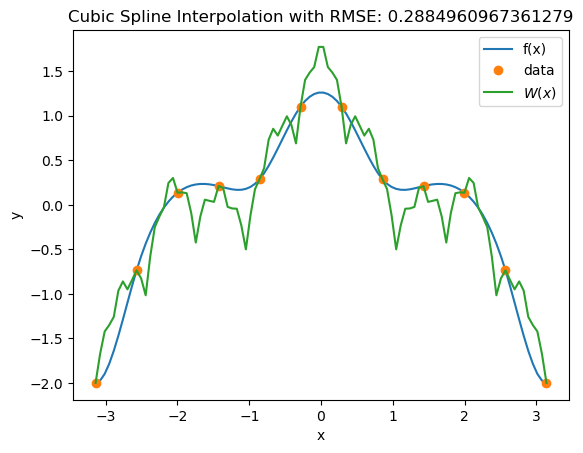

In [150]:
# plot your results as according to following example, you must provide RMSE Value as well    

n = 12  # Number of points
x = np.linspace(-np.pi, np.pi, n)
y = W(x)
dy0 = dW(W, x[0])
dyN = dW(W, x[-1])
z = MyCubicSpline(x, y, dy0, dyN)

# Define points to evaluate the spline interpolant
z_eval = np.linspace(-np.pi, np.pi, 100)
spline_values = EvalCubicSpline(x, y, z, z_eval)

# Calculate RMSE between the Weierstrass function and cubic spline interpolated values
rmse_value = np.sqrt(np.mean((W(z_eval) - spline_values) ** 2))

# Plot the results
plt.plot(z_eval, spline_values, '-', label="f(x)")
plt.plot(x, y, 'o', label="data")
plt.plot(z_eval, W(z_eval), '-', label="$W(x)$")
plt.title(f'Cubic Spline Interpolation with RMSE: {rmse_value}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

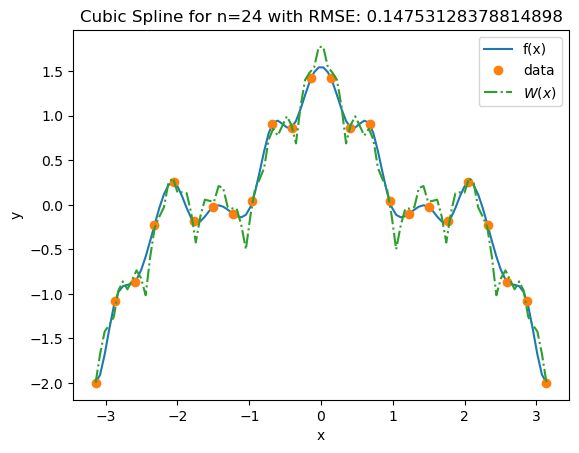

In [137]:
# plot your results as according to following example, you must provide RMSE Value as well    
n = 24  # Number of points
x = np.linspace(-np.pi, np.pi, n)
y = W(x)
dy0 = dW(W, x[0]) 
dyN = dW(W, x[-1])
z = MyCubicSpline(x, y, dy0, dyN)

# Define points to evaluate the spline interpolant
z_eval = np.linspace(-np.pi, np.pi, 100)
spline_values = EvalCubicSpline(x, y, z, z_eval)

rmse_value = np.sqrt(np.mean((W(z_eval) - spline_values) ** 2))

# Plot the results
plt.plot(z_eval, spline_values, '-', label="f(x)")
plt.plot(x, y, 'o', label="data")
plt.plot(z_eval, W(z_eval), '-.', label="$W(x)$")
plt.title(f'Cubic Spline for n=24 with RMSE: {rmse_value}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

RMSE for n=48: 0.1208


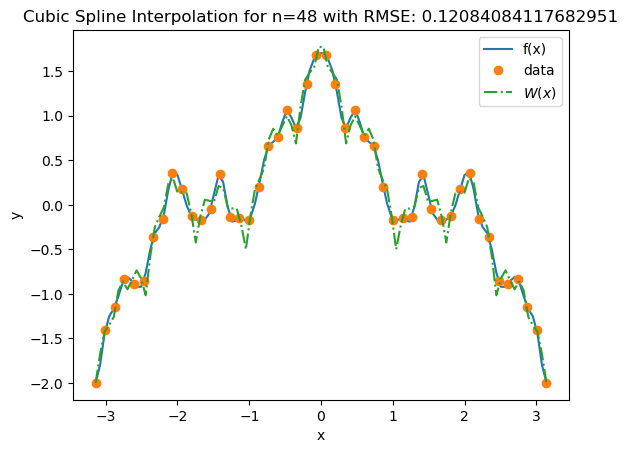

In [151]:
# plot your results as according to following example, you must provide RMSE Value as well    

n = 48  # Number of points
x = np.linspace(-np.pi, np.pi, n)
y = W(x)
dy0 = dW(W, x[0])  # First derivative at the first point
dyN = dW(W, x[-1])  # First derivative at the last point
z = MyCubicSpline(x, y, dy0, dyN)  # Compute the cubic spline coefficients

# Define points to evaluate the spline interpolant
z_eval = np.linspace(-np.pi, np.pi, 100)
spline_values = EvalCubicSpline(x, y, z, z_eval)

# Calculate RMSE between the Weierstrass function and cubic spline interpolated values
rmse_value = np.sqrt(np.mean((W(z_eval) - spline_values) ** 2))
print(f"RMSE for n=48: {rmse_value:.4f}")

# Plot the results
plt.plot(z_eval, spline_values, '-', label="f(x)")
plt.plot(x, y, 'o', label="data")
plt.plot(z_eval, W(z_eval), '-.', label="$W(x)$")
plt.title(f'Cubic Spline Interpolation for n=48 with RMSE: {rmse_value}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

